In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('/Users/himanshujaiswal/Desktop/student_risk_predication/Data/student_encoded.csv')

In [4]:
df.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,risk_levle
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Low
1,1,female,group C,some college,standard,completed,69,90,88,82.333333,Low
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667,Low
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Medium
4,4,male,group C,some college,standard,none,76,78,75,76.333333,Low


In [5]:
df['risk_levle'].value_counts()

risk_levle
Medium    523
Low       447
High       30
Name: count, dtype: int64

/var/folders/cy/ymygl9wx44n__4jnpzrvdmpc0000gn/T/ipykernel_2420/3418615297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='risk_levle', palette='pastel')


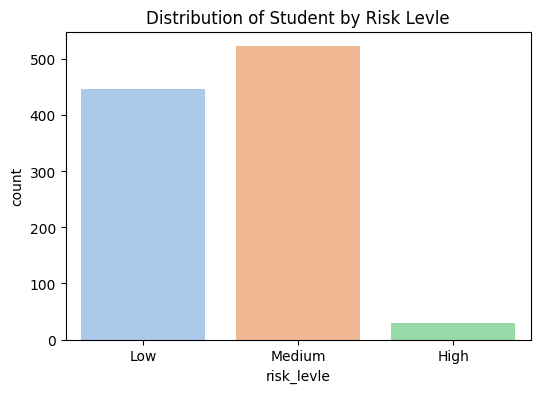

In [6]:
# target variable distribution 
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='risk_levle', palette='pastel')
plt.title('Distribution of Student by Risk Levle')
plt.show()

# insight 
most student fall in medium and low risk , Few in high risk 

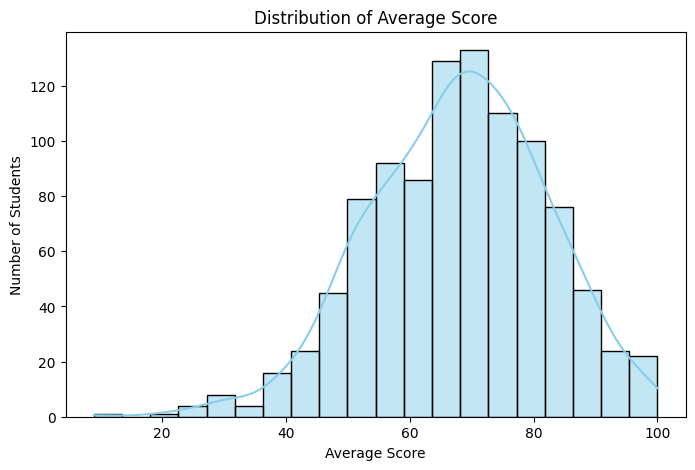

In [7]:
# average score distribution
plt.figure(figsize=(8,5))
sns.histplot(df['avg_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
plt.show()

# Insight
- average score is normally distributed 
- thresolds for risk_levle (<40,40-70,>70) seem appropriate

/var/folders/cy/ymygl9wx44n__4jnpzrvdmpc0000gn/T/ipykernel_2420/880157715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='avg_score', data=df, palette='Set2')


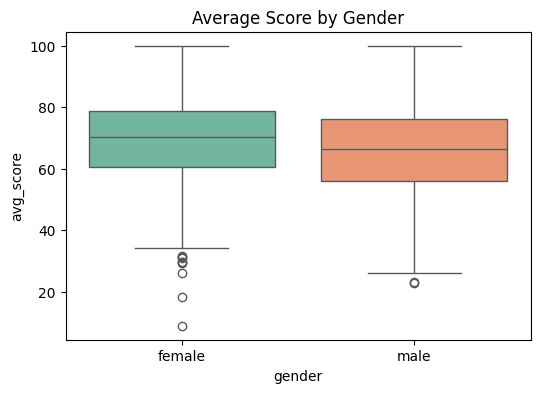

In [8]:
# average score vs gender
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='avg_score', data=df, palette='Set2')
plt.title('Average Score by Gender')
plt.show()


# Insight 
- feamles slighltly outperform males on average 
- minor performance gap , can be noted but not biased 

/var/folders/cy/ymygl9wx44n__4jnpzrvdmpc0000gn/T/ipykernel_2420/616160293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y='avg_score', data=df, palette='Set3')


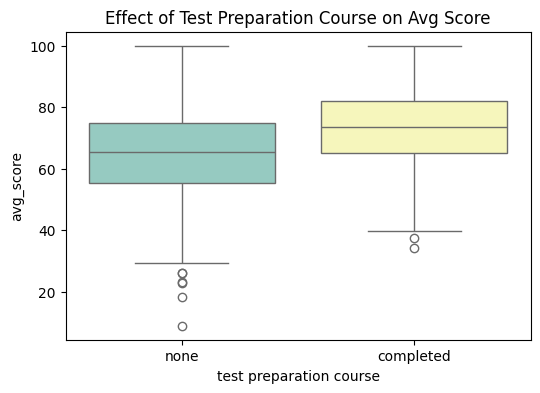

In [9]:
# Test Preparation Course Impact
plt.figure(figsize=(6,4))
sns.boxplot(x='test preparation course', y='avg_score', data=df, palette='Set3')
plt.title('Effect of Test Preparation Course on Avg Score')
plt.show()


# Insight 
- student who completed test prepration course score higher 
- strong positive correltion with performance 

/var/folders/cy/ymygl9wx44n__4jnpzrvdmpc0000gn/T/ipykernel_2420/1044620720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lunch', y='avg_score', data=df, palette='cool')


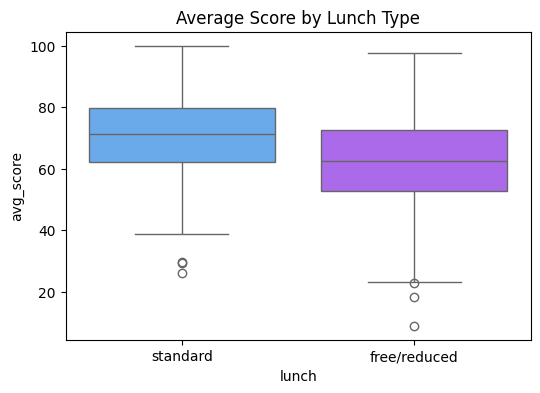

In [10]:
#Lunch Type vs Average Score
plt.figure(figsize=(6,4))
sns.boxplot(x='lunch', y='avg_score', data=df, palette='cool')
plt.title('Average Score by Lunch Type')
plt.show()


# Insight 
- student with standard lunch genrally score higher 


/var/folders/cy/ymygl9wx44n__4jnpzrvdmpc0000gn/T/ipykernel_2420/1581349177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental level of education', y='avg_score', data=df, order=df['parental level of education'].unique(), palette='magma')


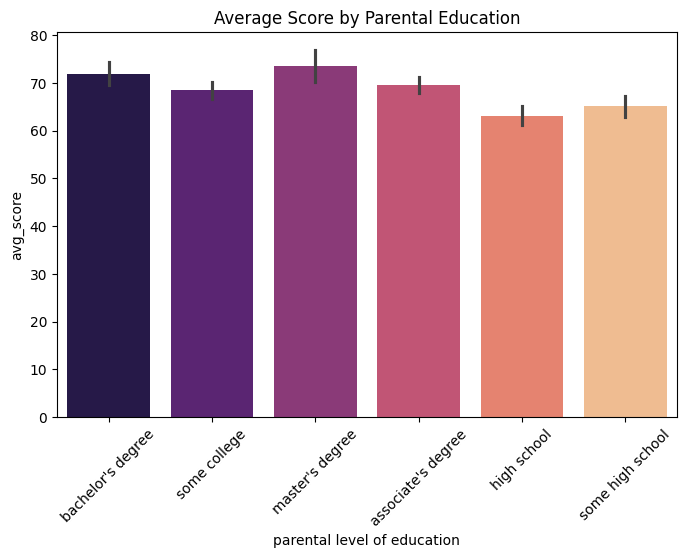

In [11]:
#Parental Education vs Average Score
plt.figure(figsize=(8,5))
sns.barplot(x='parental level of education', y='avg_score', data=df, order=df['parental level of education'].unique(), palette='magma')
plt.xticks(rotation=45)
plt.title('Average Score by Parental Education')
plt.show()


# Insight 
- higher parental education > higher student performance
- parental support positively affects learning 

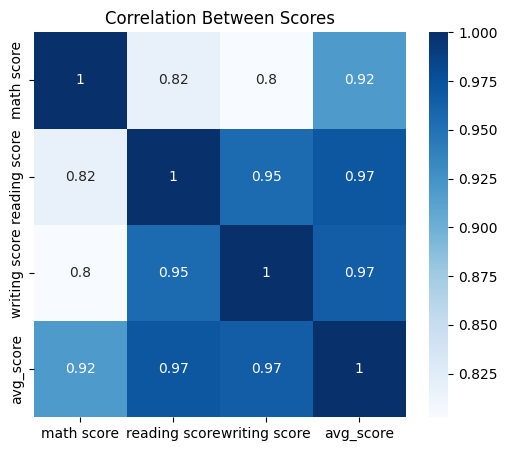

In [12]:
# Correlation Heatmap (Numeric Features)
plt.figure(figsize=(6,5))
sns.heatmap(df[['math score','reading score','writing score','avg_score']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Scores')
plt.show()


# Insight 
- strong correlation among math,reading,writing scores
- confirms avg_score is good aggregate metric 


# EDA SUMMARY
- Average scores are normally distributed, validating the risk_level thresholds.

- Females perform slightly better than males.

- Completion of test preparation courses has a strong positive impact on scores.

- Socio-economic factors like lunch type and parental education affect performance.

- Strong correlation exists among math, reading, and writing scores, supporting the engineered avg_score feature.

- Target classes (High, Medium, Low) are reasonably balanced, suitable for classification models.